In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("archive-2/full_data.csv")

In [4]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:title={'center':'Age'}>

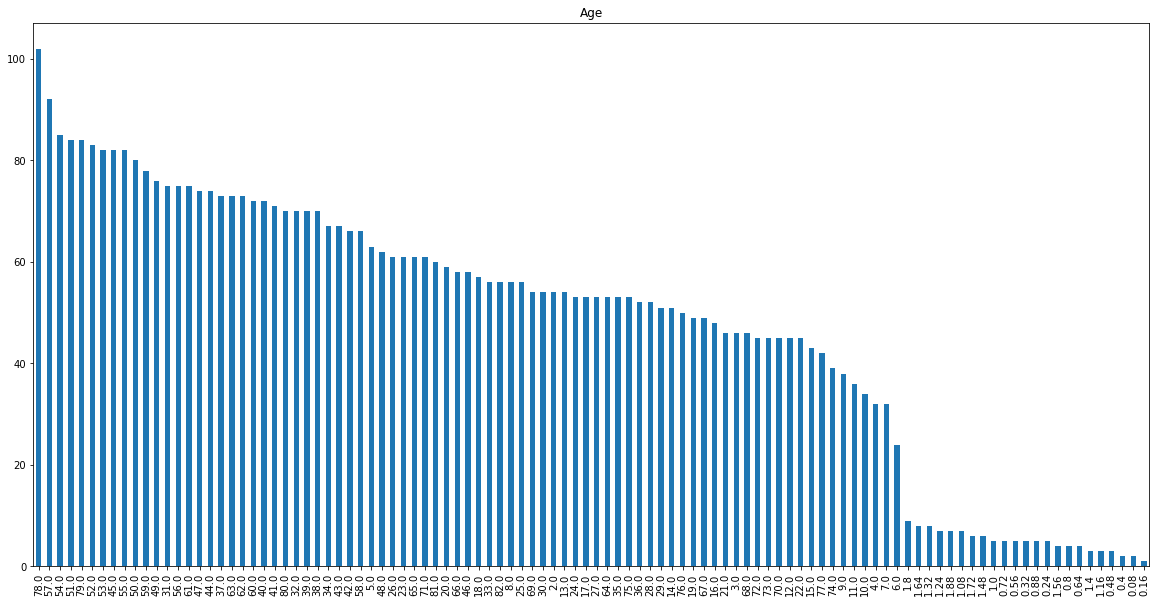

In [7]:
plt.figure(figsize=(20,10))
df["age"].value_counts().plot.bar(title='Age')

<AxesSubplot:title={'center':'HyperTensions'}>

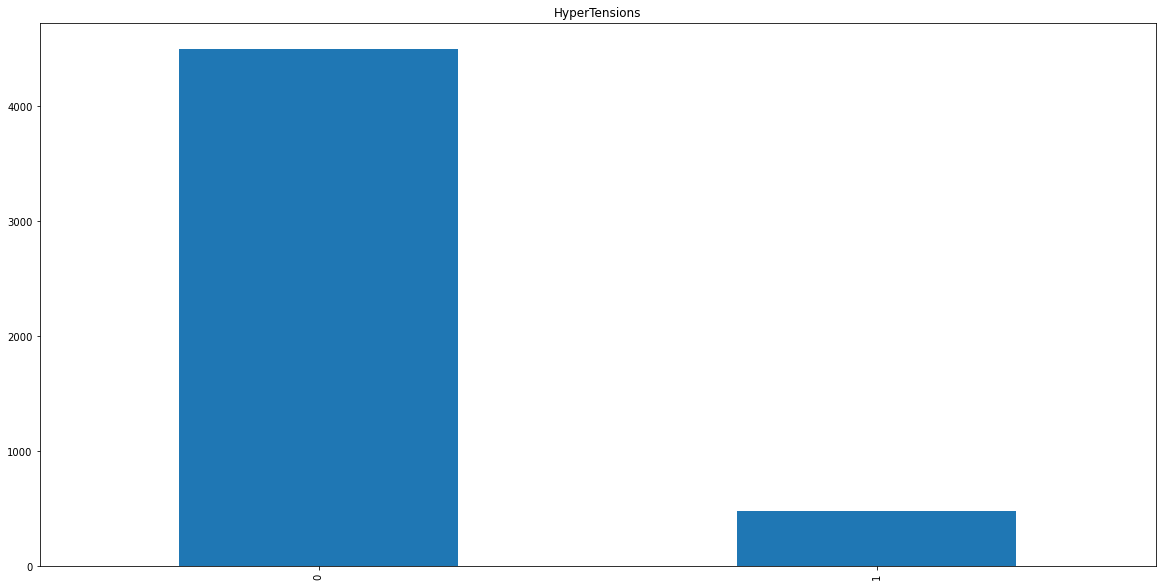

In [8]:
plt.figure(figsize=(20,10))
df["hypertension"].value_counts().plot.bar(title='HyperTensions')

<AxesSubplot:title={'center':'Heart Disease'}>

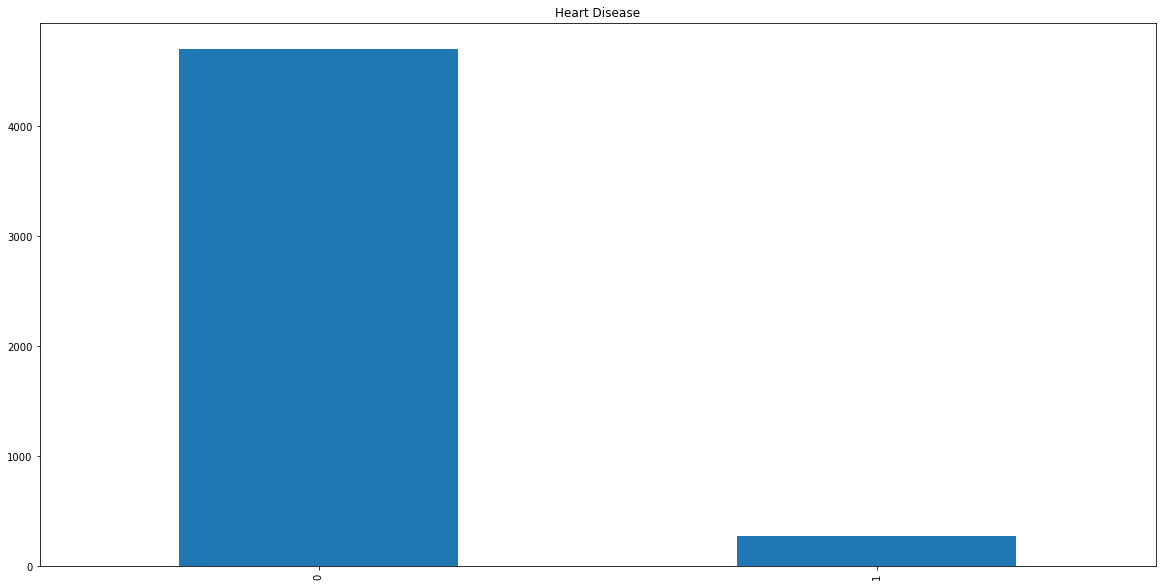

In [9]:
plt.figure(figsize=(20,10))
df["heart_disease"].value_counts().plot.bar(title='Heart Disease')

<AxesSubplot:title={'center':'Ever Married'}>

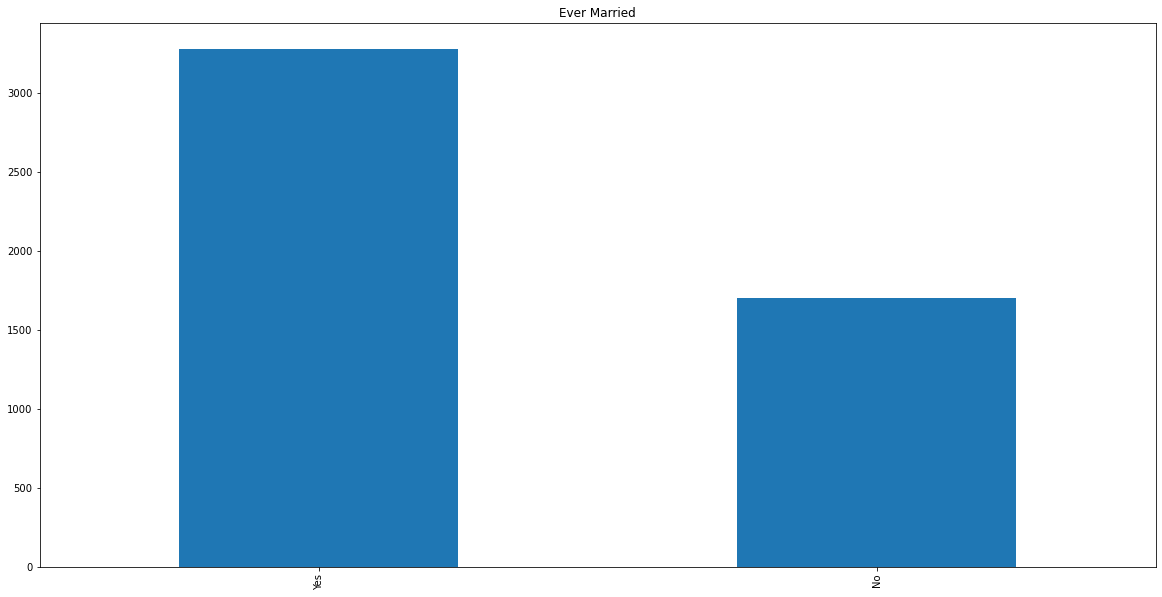

In [10]:
plt.figure(figsize=(20,10))
df["ever_married"].value_counts().plot.bar(title='Ever Married')

<AxesSubplot:title={'center':'Work Type'}>

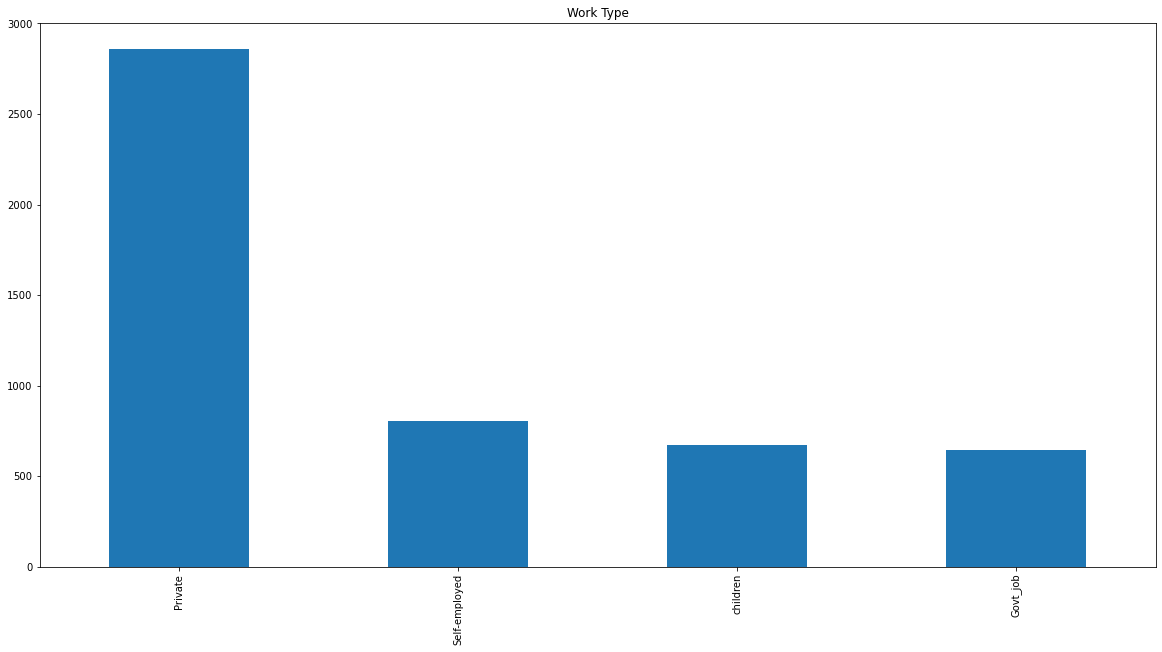

In [11]:
plt.figure(figsize=(20,10))
df["work_type"].value_counts().plot.bar(title='Work Type')

<AxesSubplot:title={'center':'Residence Type'}>

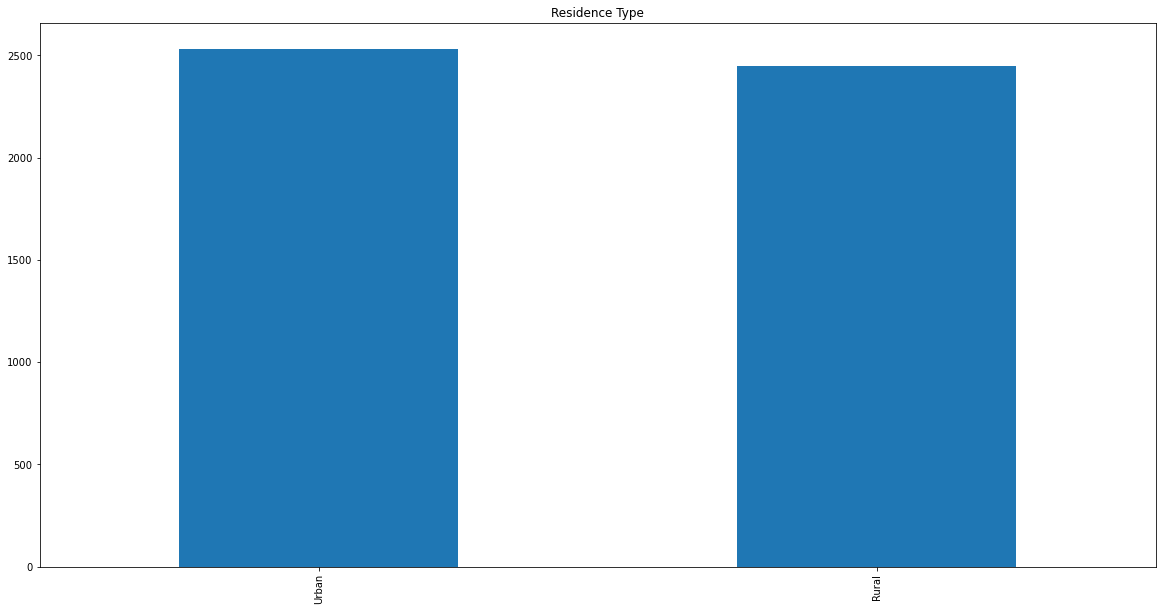

In [12]:
plt.figure(figsize=(20,10))
df["Residence_type"].value_counts().plot.bar(title='Residence Type')

<AxesSubplot:title={'center':'Smoking Status'}>

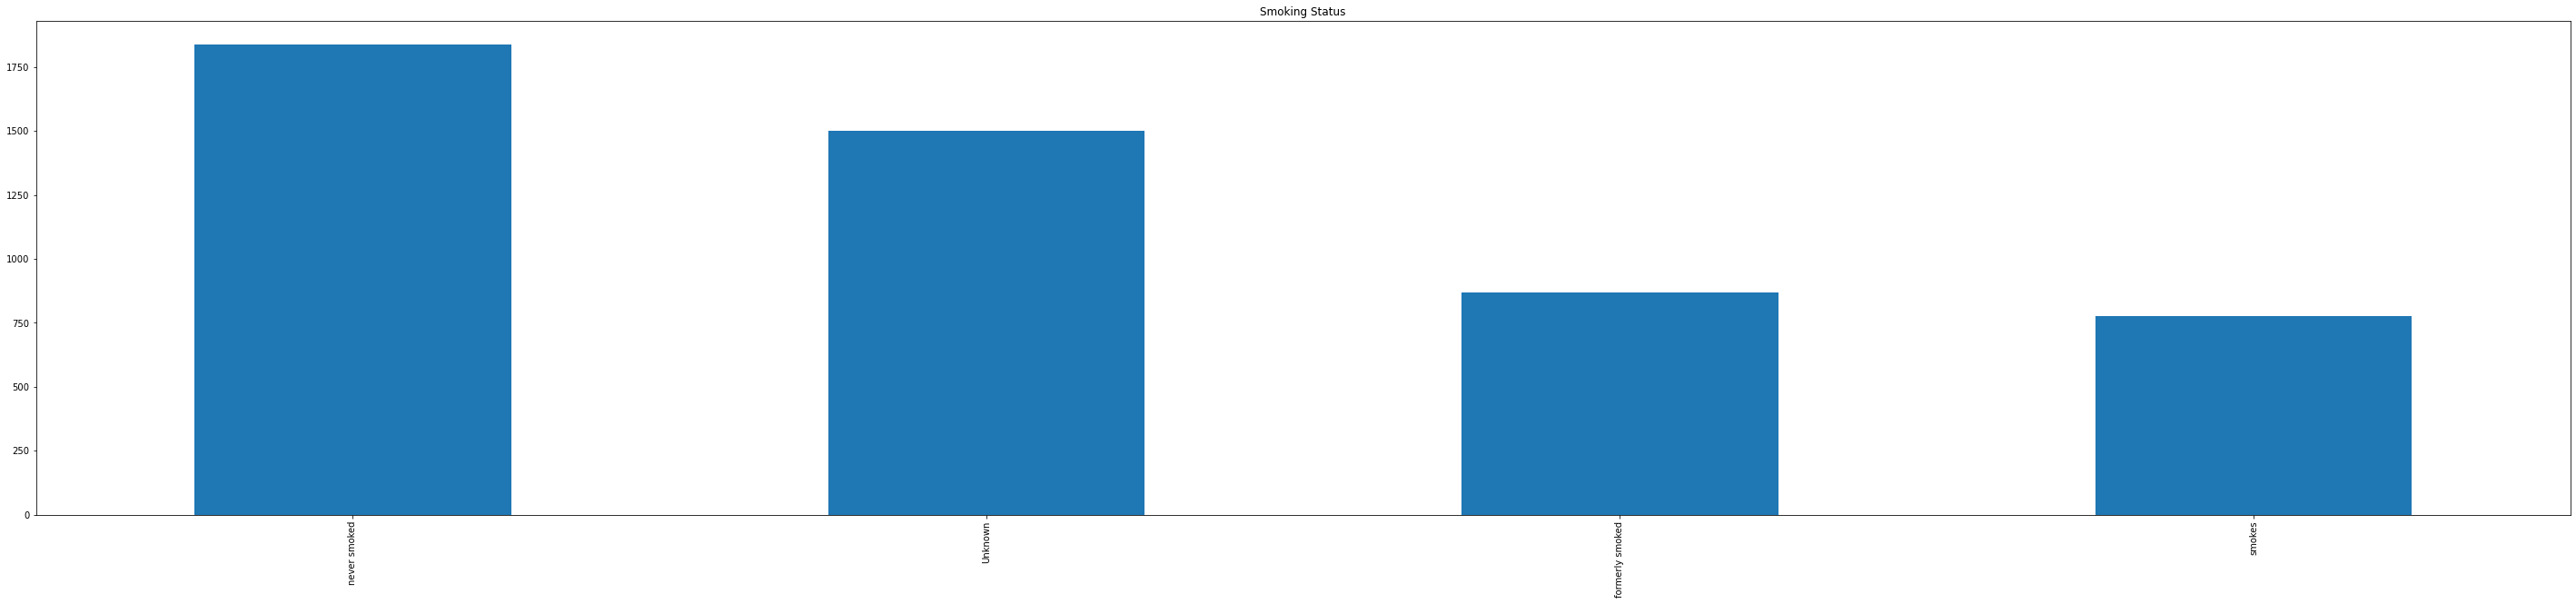

In [13]:
plt.figure(figsize=(50,10))
df["smoking_status"].value_counts().plot.bar(title='Smoking Status')

<AxesSubplot:title={'center':'stroke'}>

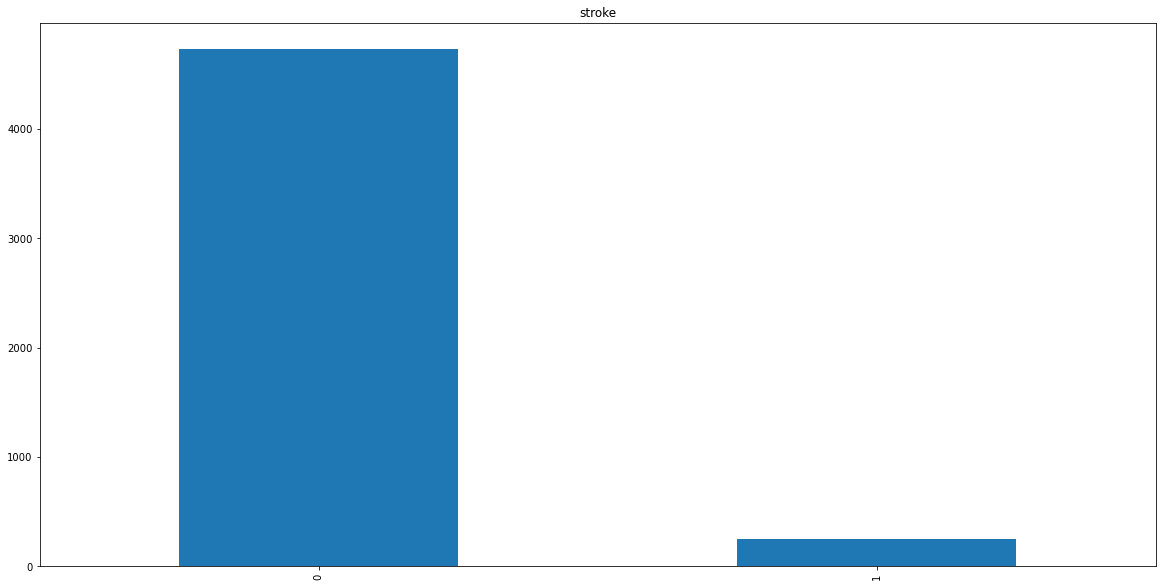

In [14]:
plt.figure(figsize=(20,10))
df["stroke"].value_counts().plot.bar(title='stroke')

<AxesSubplot:title={'center':'Glucose Level'}>

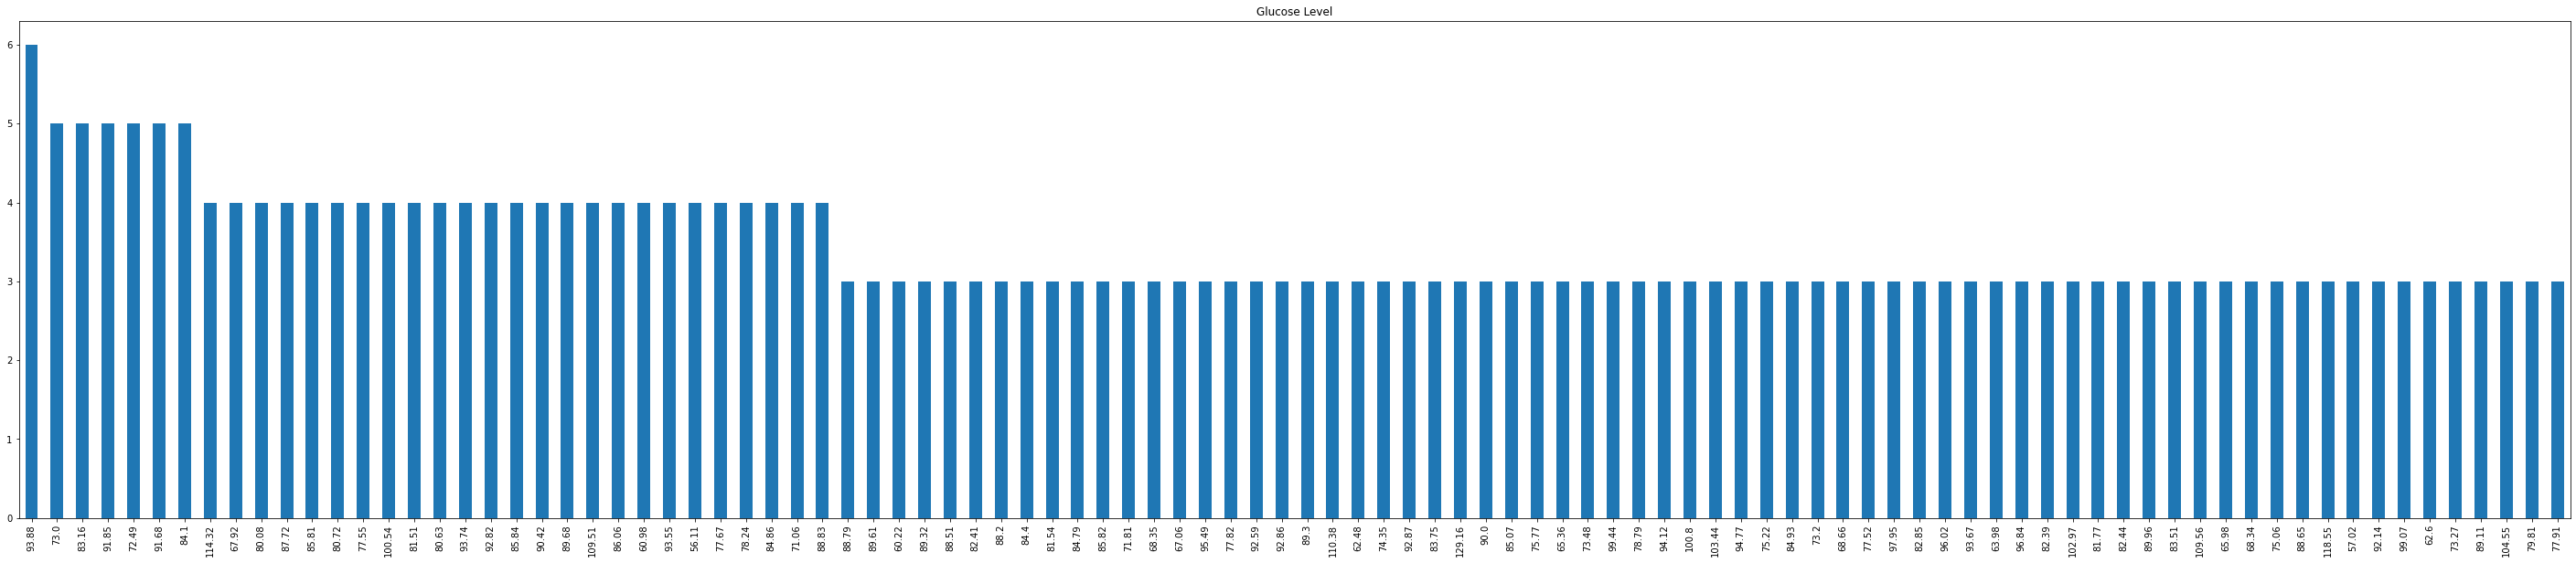

In [15]:
plt.figure(figsize=(50,10))
df["avg_glucose_level"].value_counts().head(100).plot.bar(title="Glucose Level")

<AxesSubplot:>

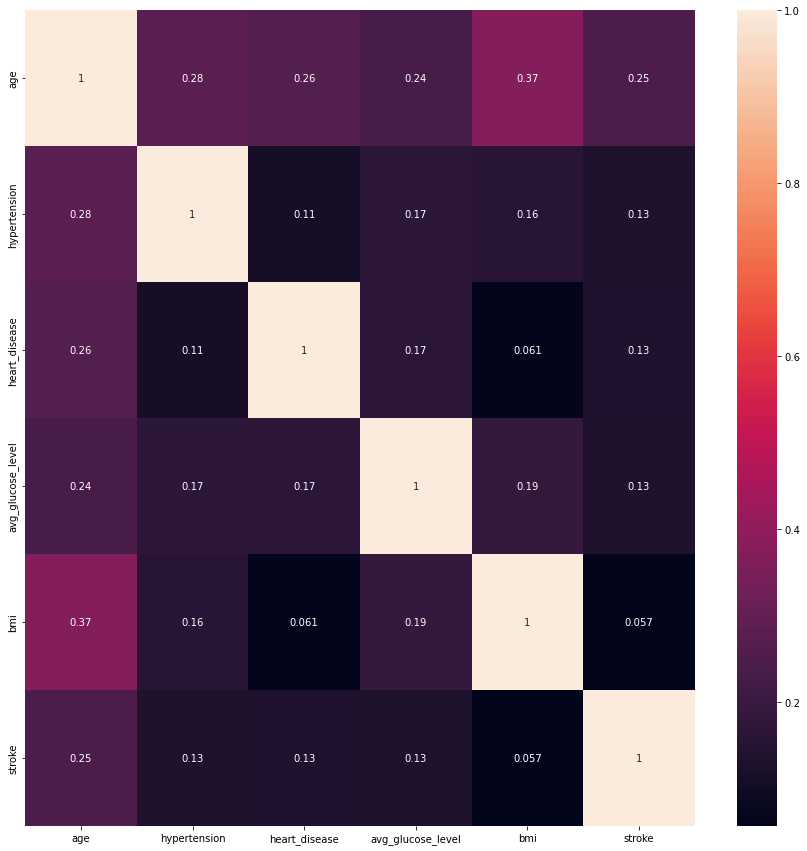

In [16]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)

## Conclusions of The Visualization:

* Lot of married guys are affected by brain stroke
* Most of them have never smoked in their life
* With this insight we're judging here,Females are more affected by brain strokes
* Most of them havent experienced HyperTension
* Most of have no heart disease
* Most of them work in Private Companies
* Most of the people who have Brain Stroke is living in Urban Region.


# ML Model Making

In [17]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['gender']=label_encoder.fit_transform(df['gender'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [18]:
X = df["stroke"]
y = df.drop(['stroke'], axis=1)

In [19]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(y, X, test_size=0.30, shuffle=True, random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1430
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.94      1495



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [23]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9475043029259896
0.9565217391304348


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
classifiers=[['Naive Bayes :', GaussianNB()],['LogisticRegression :', LogisticRegression(max_iter = 1000)], ['DecisionTree :',DecisionTreeClassifier()]]

In [26]:
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, y_train.ravel())
    predictions = classifier.predict(x_test)
    print(name, accuracy_score(y_test, predictions))

Naive Bayes : 0.8635451505016722
LogisticRegression : 0.9565217391304348
DecisionTree : 0.903010033444816


In [27]:
from sklearn.ensemble import VotingClassifier
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()


    
vot_hard = VotingClassifier(estimators= classifiers, voting='hard')
vot_hard.fit(x_train, y_train)

VotingClassifier(estimators=[['Naive Bayes :', GaussianNB()],
                             ['LogisticRegression :',
                              LogisticRegression(max_iter=1000)],
                             ['DecisionTree :', DecisionTreeClassifier()]])

In [29]:
vot_soft = VotingClassifier(estimators = classifiers, voting ='soft')
vot_soft.fit(x_train, y_train)

VotingClassifier(estimators=[['Naive Bayes :', GaussianNB()],
                             ['LogisticRegression :',
                              LogisticRegression(max_iter=1000)],
                             ['DecisionTree :', DecisionTreeClassifier()]],
                 voting='soft')

In [30]:
print("Training data accuracy:", vot_hard.score(x_train, y_train))
print("Testing data accuracy", vot_hard.score(x_test, y_test))

print("Training data accuracy:", vot_soft.score(x_train, y_train))
print("Testing data accuracy", vot_soft.score(x_test, y_test))

Training data accuracy: 0.9695926563396443
Testing data accuracy 0.9418060200668896
Training data accuracy: 0.9718875502008032
Testing data accuracy 0.9384615384615385


### Training accuracy and Testing accuracy are pretty close to each other here,So there is no chance of overfitting here,Compared to standlone machine learning models,The ensemble approaches are slightly low,All the models giving some good accuracy here,Especically random forest and logistic regression